In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Homestays_Data(in).csv")
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
  data.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

## 1. Feature Engineering: Host_Tenure, Amenities_Count, Days_Since_Last_Review.

> Steps to implement.
1. Reading the data.
2. Implementing calculations: Converting the date columns to datetime objects to facilitate the calculation of tenure and days since the last review. And for Amenities_Count, handling the amenities column array which might require parsing a string of amenities into individual items and then counting them.
3. Finally, adding three new columns.



In [6]:
# Calculating the Host_Tenure

from datetime import datetime
data['host_since'] = pd.to_datetime(data['host_since'])
current_date = datetime.now()

#Main logic
data['Host_Tenure'] = (current_date - data['host_since']).dt.days / 365.25
data[['host_since', 'Host_Tenure']].head()


,host_since,Host_Tenure
0,2012-03-26,12.112252
1,2017-06-19,6.880219
2,2016-10-25,7.529090
3,2015-04-19,9.048597
4,2015-03-01,9.182752


In [7]:
# Calculating the Amenities Count

# Function for parsing
def count_amenities_improved(amenities_str):
    try:
        cleaned_str = amenities_str.translate({ord(i): None for i in '{}"'})
        amenities_list = cleaned_str.split(',')
        return len([amen for amen in amenities_list if amen])
    except:
        return 0

data['Amenities_Count'] = data['amenities'].apply(count_amenities_improved)
data[['amenities', 'Amenities_Count']].head()


,amenities,Amenities_Count
0,"{""Wireless Internet"",""Air conditioning"",Kitche...",9
1,"{""Wireless Internet"",""Air conditioning"",Kitche...",15
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",19
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",15
4,"{TV,Internet,""Wireless Internet"",""Air conditio...",12


In [8]:
# Calculating days since last review

data['last_review'] = pd.to_datetime(data['last_review'])

#Main Logic
data['Days_Since_Last_Review'] = (current_date - data['last_review']).dt.days
data[['last_review', 'Days_Since_Last_Review']].head()


,last_review,Days_Since_Last_Review
0,2016-07-18,2849.0
1,2017-09-23,2417.0
2,2017-09-14,2426.0
3,NaT,NaN
4,2017-01-22,2661.0


## 2. Exploratory Data Analysis

Aim: Understanding the correlation of Log Price with Numerical and Categorical values, and visualization of some important features.

Beginning with understanding correlation of log prices with numerical features like accommodates, number_of_reviews, Host_Tenure, Amenities_Count, and Days_Since_Last_Review, by using scatter plots, and studying distribution of Log prices using histogram.

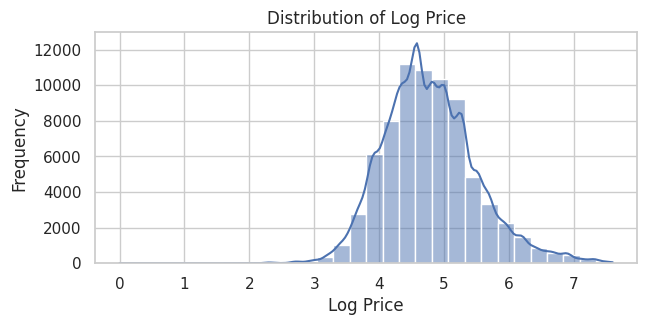

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 3))
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

This histogram shows normal distribution typical for pricing data analysis.

Now, creating scatter plots for understanding the correlation between Log prices and numerical feature listed above in description. To be noted that, the newly feature engineered features are also included here.

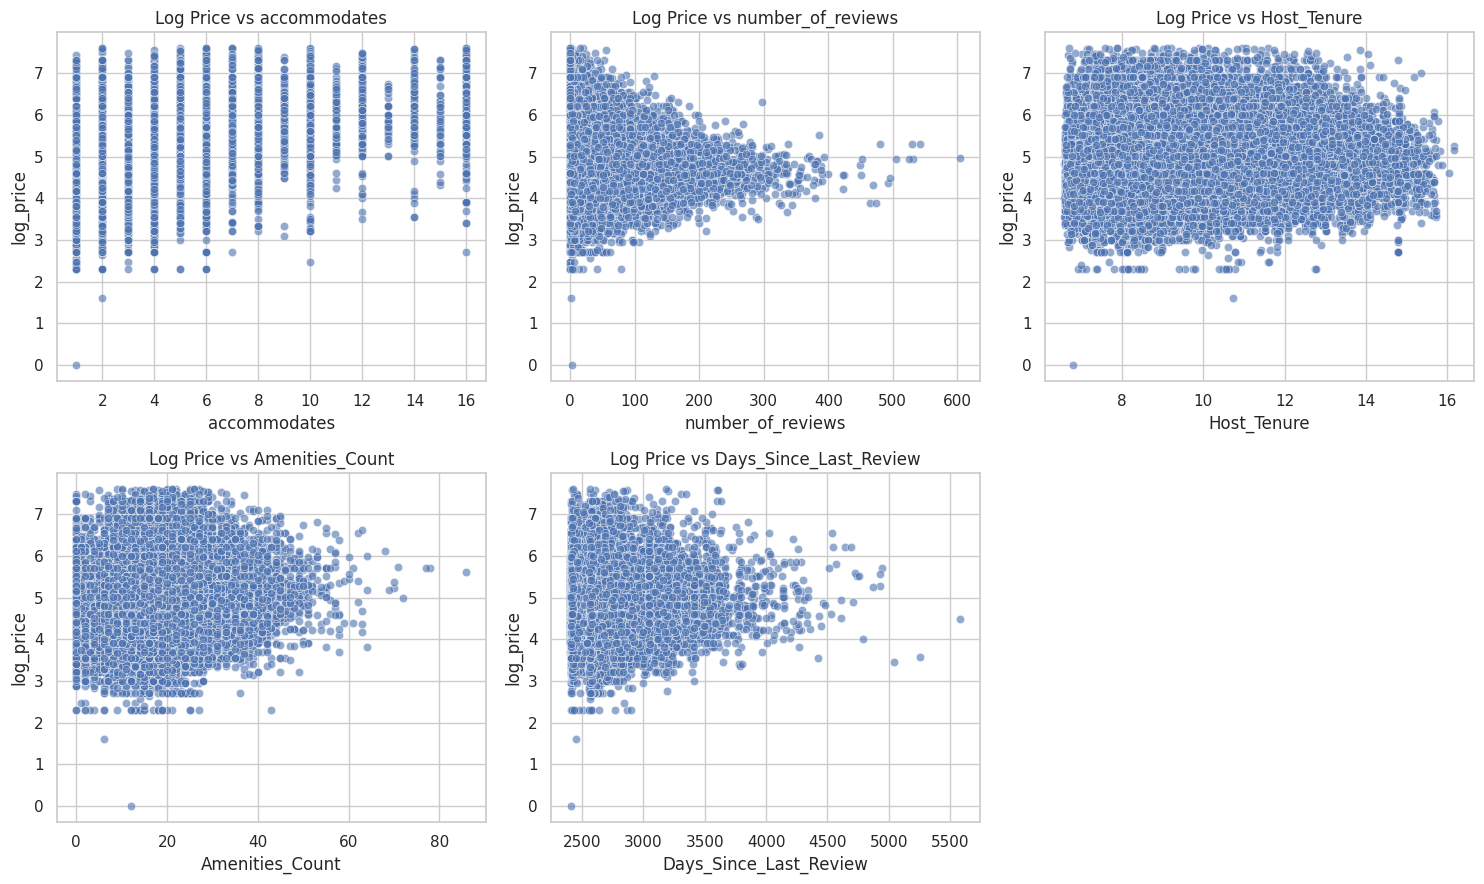

log_price                 1.000000
accommodates              0.567574
number_of_reviews        -0.032470
Host_Tenure               0.078333
Amenities_Count           0.194063
Days_Since_Last_Review    0.021550
Name: log_price, dtype: float64

In [10]:
plt.figure(figsize=(15, 9))
numerical_features = ['accommodates', 'number_of_reviews', 'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x=feature, y='log_price', alpha=0.6)
    plt.title(f'Log Price vs {feature}')

plt.tight_layout()
plt.show()

correlation_with_log_price = data[['log_price'] + numerical_features].corr()['log_price']
correlation_with_log_price

Here, by analyzing the correlation between individual numerical features and log prices.

1.   Accomodates shows a better positive correlation which state that listings which can accommodate more people tend to have higher log prices.
2.   Number of reviews has a very weak and neagtive correlation with log prices indicating that the number of reviews has almost no direct impact on the log price.


Now, understanding the correlation between categorical features and log prices using box plots.

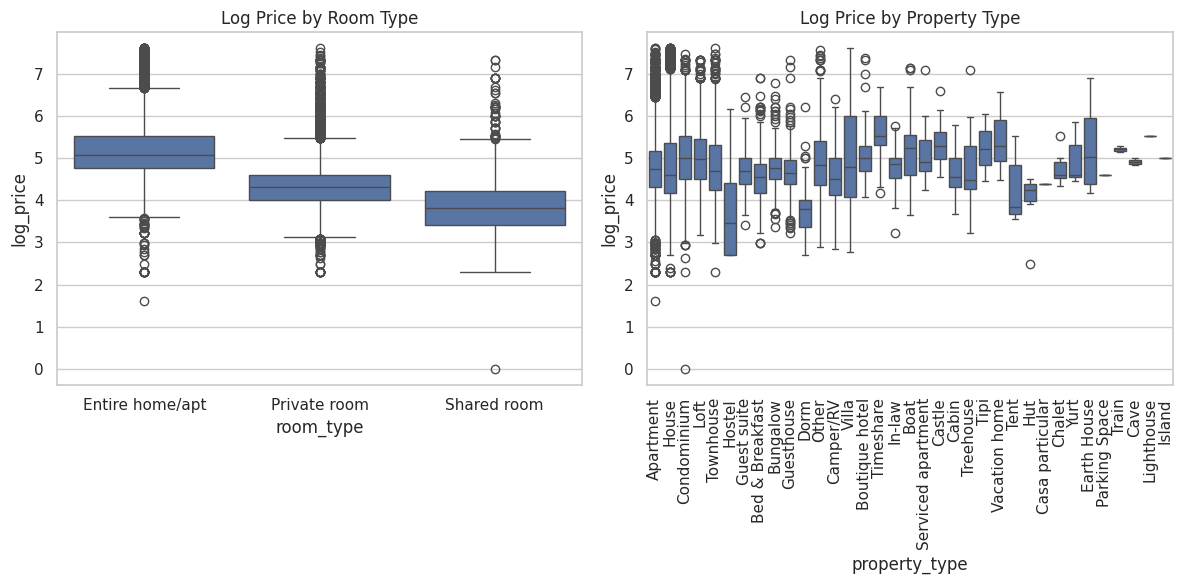

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='room_type', y='log_price')
plt.title('Log Price by Room Type')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='property_type', y='log_price')
plt.title('Log Price by Property Type')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


My understandings.


1.   For Room type feature: The prices for home and appartments are much higher. This can be due to the amenities or privacy they offer.
2.   For Property type: Their are several variations. Same information can be conceived here as the first feature.

## 3. Geospatial Analysis.



In [12]:
try:
    from mpl_toolkits.basemap import Basemap
    basemap_available = True
except ImportError:
    basemap_available = False

# Function to plot using Basemap
def plot_with_basemap():
    plt.figure(figsize=(12, 8))
    m = Basemap(projection='merc', llcrnrlat=data.latitude.min(), urcrnrlat=data.latitude.max(),
                llcrnrlon=data.longitude.min(), urcrnrlon=data.longitude.max(), resolution='h')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.scatter(data['longitude'].values, data['latitude'].values, latlon=True,
              c=data['log_price'], s=20, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Log Price')
    plt.title('Geospatial Distribution of Listings Colored by Log Price')
    plt.show()

if basemap_available:
    plot_with_basemap()
else:
    print("Basemap not available. Proceeding with an alternative visualization method.")


Basemap not available. Proceeding with an alternative visualization method.


The Map finds higher concentration of listings in major cities on the East and West coasts of the United States. The colour indicate changes in pricing.

Now, I will see if certain neighbourhoods or city centres influence pricing.

In [13]:
import pandas as pd
from geopy.distance import geodesic

# Using NYC centre Manhattan as a reference point
nyc_center = (40.7831, -73.9712)

# Function to calculate distance to NYC center
def calculate_distance(row, center):
    listing_coords = (row['latitude'], row['longitude'])
    return geodesic(listing_coords, center).kilometers

data['Distance_from_NYC_Center'] = data.apply(calculate_distance, center=nyc_center, axis=1)
correlation = data['Distance_from_NYC_Center'].corr(data['log_price'])
average_prices_by_neighborhood = data.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False)
print("Correlation between distance from NYC center and log price:", correlation)
print("Average prices by neighborhood:")
print(average_prices_by_neighborhood)
data.to_csv('path_to_save_modified_csv', index=False)


Correlation between distance from NYC center and log price: 0.04671819200822114
Average prices by neighborhood:
neighbourhood
Wilmington                  7.170120
Chevy Chase, MD             7.130899
Observatory Circle          6.715383
Sea Cliff                   6.259786
Mill Basin                  6.214608
                              ...   
Twining                     3.627909
Suitland-Silver Hill, MD    3.610918
West Lawn                   3.583355
West Elsdon                 3.400827
South Chicago               3.148447
Name: log_price, Length: 619, dtype: float64


##### 1. The wide range in average log prices across neighborhoods shows significant geographical variability in pricing. Neighborhoods like Wilmington and Chevy Chase, MD, show higher average prices, which could reflect their higher living costs.
##### 2. On the other hand, neighborhoods like South Chicago and West Elsdon shows much lower average prices, which might indicate less demand or lower economic conditions.

## 4. Sentiment Analysis on Textual Data.

In [15]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline
import torch


device = 0 if torch.cuda.is_available() else -1

# DistilBERT Model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Initializing pipeine
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device=device)

def batch_sentiment_analysis(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        # Directly pass the batch of texts to the pipeline
        batch_results = sentiment_pipeline(batch, truncation=True, max_length=512)
        results.extend(batch_results)
    return results

filtered_data = data.dropna(subset=['description'])
sentiments = batch_sentiment_analysis(filtered_data['description'].tolist())
filtered_data['sentiment'] = [res['label'] for res in sentiments]

# Saving the data
filtered_data.to_csv('path_to_save_your_updated_dataset.csv', index=False)  # Update the path as needed

# Print some of the results to verify
print(filtered_data[['description', 'sentiment']].head())


                                         description sentiment
0  Beautiful, sunlit brownstone 1-bedroom in the ...  POSITIVE
1  Enjoy travelling during your stay in Manhattan...  POSITIVE
2  The Oasis comes complete with a full backyard ...  POSITIVE
3  This light-filled home-away-from-home is super...  POSITIVE
4  Cool, cozy, and comfortable studio located in ...  POSITIVE


In [16]:
data['sentiment'] = sentiments  # Adding the sentiments labels to the data

# Saving the csv
output_path = 'path_to_save_your_updated_dataset_with_sentiments.csv'
data.to_csv(output_path, index=False)
print(data[['description', 'sentiment']].head())


                                         description  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...   
1  Enjoy travelling during your stay in Manhattan...   
2  The Oasis comes complete with a full backyard ...   
3  This light-filled home-away-from-home is super...   
4  Cool, cozy, and comfortable studio located in ...   

                                           sentiment  
0  {'label': 'POSITIVE', 'score': 0.9998669624328...  
1  {'label': 'POSITIVE', 'score': 0.9991324543952...  
2  {'label': 'POSITIVE', 'score': 0.9973995685577...  
3  {'label': 'POSITIVE', 'score': 0.9987308382987...  
4  {'label': 'POSITIVE', 'score': 0.9997095465660...  


In [17]:
data['Sentiment_Label'] = [result['label'] for result in sentiments]
data['Sentiment_Score'] = [result['score'] for result in sentiments]

print(data[['description', 'Sentiment_Label', 'Sentiment_Score']].head())


                                         description Sentiment_Label  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...        POSITIVE   
1  Enjoy travelling during your stay in Manhattan...        POSITIVE   
2  The Oasis comes complete with a full backyard ...        POSITIVE   
3  This light-filled home-away-from-home is super...        POSITIVE   
4  Cool, cozy, and comfortable studio located in ...        POSITIVE   

   Sentiment_Score  
0         0.999867  
1         0.999132  
2         0.997400  
3         0.998731  
4         0.999710  


In [18]:
data.dtypes

id                                   int64
log_price                          float64
property_type                       object
room_type                           object
amenities                           object
accommodates                         int64
bathrooms                          float64
bed_type                            object
cancellation_policy                 object
cleaning_fee                          bool
city                                object
description                         object
first_review                        object
host_has_profile_pic                object
host_identity_verified              object
host_response_rate                  object
host_since                  datetime64[ns]
instant_bookable                    object
last_review                 datetime64[ns]
latitude                           float64
longitude                          float64
name                                object
neighbourhood                       object
number_of_r

## 5. Amenities Analysis

Parsing all the amenities column and checking their coorelation score with log price

In [19]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

def parse_amenities(amenities_str):
    try:
        return list(ast.literal_eval(amenities_str))
    except ValueError:
        return []

data['amenities_parsed'] = data['amenities'].apply(parse_amenities)

# Converting the list of amenities into binary features
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(data['amenities_parsed'])
amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)
correlations_with_price = pd.Series(data=[amenities_df[col].corr(data['log_price']) for col in amenities_df.columns],
                                    index=amenities_df.columns).sort_values(ascending=False)

correlations_with_price


Suitable for events                           0.013505
Host greets you                               0.010435
Safety card                                   0.005819
Laptop friendly workspace                     0.005200
Family/kid friendly                           0.003396
Pets allowed                                  0.002736
Wheelchair accessible                         0.000412
Hot tub                                      -0.000418
Buzzer/wireless intercom                     -0.000621
Elevator in building                         -0.000973
First aid kit                                -0.001366
Fire extinguisher                            -0.001734
24-hour check-in                             -0.002623
Smart lock                                   -0.003521
Pets live on this property                   -0.004554
Carbon monoxide detector                     -0.004919
Cable TV                                     -0.005099
Free parking on premises                     -0.005351
Smoking al

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

def parse_amenities(amenities_str):
    try:
        return list(ast.literal_eval(amenities_str))
    except ValueError:
        return []

data['amenities_parsed'] = data['amenities'].apply(parse_amenities)
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(data['amenities_parsed'])
amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)
correlations_with_price = pd.Series(data=[amenities_df[col].corr(data['log_price']) for col in amenities_df.columns],
                                    index=amenities_df.columns).sort_values(ascending=False)

# Filtering the amenities
positive_correlated_amenities = correlations_with_price[correlations_with_price > 0.005]
selected_amenities_df = amenities_df[positive_correlated_amenities.index]
final_data = pd.concat([data, selected_amenities_df], axis=1)

# Saving the updated dataset
final_csv_path = '/content/updated_homestays_data_with_selected_amenities.csv'
final_data.to_csv(final_csv_path, index=False)
final_csv_path, positive_correlated_amenities


('/content/updated_homestays_data_with_selected_amenities.csv',
 Suitable for events          0.013505
 Host greets you              0.010435
 Safety card                  0.005819
 Laptop friendly workspace    0.005200
 dtype: float64)

Selected only those amenities which are important

## 6. Categorical Data Encoding

In [21]:
# One-Hot Encoding
categorical_columns = ['room_type', 'city', 'property_type']
final_data = pd.get_dummies(final_data, columns=categorical_columns, drop_first=True)
final_data.to_csv('updated_dataset_with_encoded_features.csv', index=False)

print("Data encoding complete. Updated dataset saved.")

Data encoding complete. Updated dataset saved.


In [22]:
final_data.head()

,id,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,first_review,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,...,False,False,False,False,False,False,False,False,False,False
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,Enjoy travelling during your stay in Manhattan...,8/5/2017,...,False,False,False,False,False,False,False,False,False,False
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,The Oasis comes complete with a full backyard ...,4/30/2017,...,False,False,False,False,False,False,False,False,False,False
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,This light-filled home-away-from-home is super...,NaN,...,False,False,False,False,False,False,False,False,False,False
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,"Cool, cozy, and comfortable studio located in ...",5/12/2015,...,False,False,False,False,False,False,False,False,False,False


## 7. Model Development and Training

For Model training and development, firstly my main task is to check data for quality purposes, preprocesses it and then train it.

In [23]:
from datetime import datetime

# Loading the updated dataset
file_path = '/content/updated_dataset_with_encoded_features.csv'
data_new = pd.read_csv(file_path)

# Removing unnecessary feature columns
columns_to_drop = ['amenities', 'description', 'name', 'sentiment', 'amenities_parsed']
data_new.drop(columns=columns_to_drop, inplace=True, errors='ignore')

data_new['host_since_missing'] = data_new['host_since'].isnull().astype(int)
data_new['Host_Tenure_missing'] = data_new['Host_Tenure'].isnull().astype(int)
data_new['Days_Since_Last_Review_missing'] = data_new['Days_Since_Last_Review'].isnull().astype(int)

if 'Days_Since_Last_Review' in data_new.columns:
    data_new['Days_Since_Last_Review'].fillna(9999, inplace=True)

data_new.to_csv('cleaned_dataset.csv', index=False)


<ipython-input-23-77e5cb7378ea>:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(file_path)


In [24]:
import pandas as pd

# Handling missing values
numerical_cols_with_nans = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
for col in numerical_cols_with_nans:
    if col in data_new.columns:
        data_new[col].fillna(data_new[col].median(), inplace=True)

categorical_cols_with_nans = ['host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'zipcode']
for col in categorical_cols_with_nans:
    if col in data_new.columns:
        data_new[col].fillna(data_new[col].mode()[0], inplace=True)

Dealing with all features with respect to encoding, missing values etc.

In [25]:
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

boolean_columns = ['host_identity_verified', 'instant_bookable', 'host_has_profile_pic']
data_new[boolean_columns] = data_new[boolean_columns].apply(lambda x: x == 't')

# Using NYC centre (Manhattan) as a reference point
nyc_center = (40.7831, -73.9712)

# Function to calculate distance to NYC center
def calculate_distance(row, center):
    listing_coords = (row['latitude'], row['longitude'])
    return geodesic(listing_coords, center).kilometers


data_new['Distance_from_NYC_Center'] = data_new.apply(lambda row: calculate_distance(row, nyc_center), axis=1)
correlation = data_new['Distance_from_NYC_Center'].corr(data_new['log_price'])
print("Correlation between distance from NYC center and log price:", correlation)

# Calculating average prices by neighborhood
average_prices_by_neighborhood = data_new.groupby('neighbourhood')['log_price'].mean()
data_new['neighbourhood'] = data_new['neighbourhood'].map(average_prices_by_neighborhood)

# Encoding bed_type using LabelEncoder
label_encoder = LabelEncoder()
data_new['bed_type'] = label_encoder.fit_transform(data_new['bed_type'])

imputer = SimpleImputer(strategy='median')
numeric_columns = data_new.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
data_new[numeric_columns] = imputer.fit_transform(data_new[numeric_columns])

# Encoding categorical data using OneHotEncoder
categorical_features = ['cancellation_policy']
numeric_features = data_new.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
numeric_features.remove('log_price')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X = data_new.drop('log_price', axis=1)
y = data_new['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Correlation between distance from NYC center and log price: 0.04671819200822114
Mean Squared Error: 1606211193431506.0


Evaluating the Random forest and Gradient Boosting models

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X = data_new.drop('log_price', axis=1)
y = data_new['log_price']
categorical_features = ['cancellation_policy']
numeric_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# Creating a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_model)])
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', gb_model)])

rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Mean Squared Error:", rf_mse)
gb_pipeline.fit(X_train, y_train)
gb_y_pred = gb_pipeline.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Mean Squared Error:", gb_mse)


Random Forest Mean Squared Error: 0.1527017625802144
Gradient Boosting Mean Squared Error: 0.16056747651947295


## 8. Model Optimization and Validation

Buiding a pipeline using other hyperparameters

In [27]:
from sklearn.metrics import mean_squared_error


categorical_features = ['cancellation_policy']
numeric_features = data_new.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
numeric_features.remove('log_price')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [10],
    'regressor__min_samples_split': [2]
}
# Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=-1
)


X = data_new.drop('log_price', axis=1)
y = data_new['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

subset_ratio = 0.1  # Using 10% of the data for hardware purposes
subset_index = int(len(X_train) * subset_ratio)
subset_X_train = X_train[:subset_index]
subset_y_train = y_train[:subset_index]
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):", grid_search.best_score_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test set MSE:", mse)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best cross-validation score (negative MSE): -0.1642116961805801
Test set MSE: 0.16040964925433307


## 9. Feature Importance and Model Insights

Plotting a chart describing the best features of the dataset.

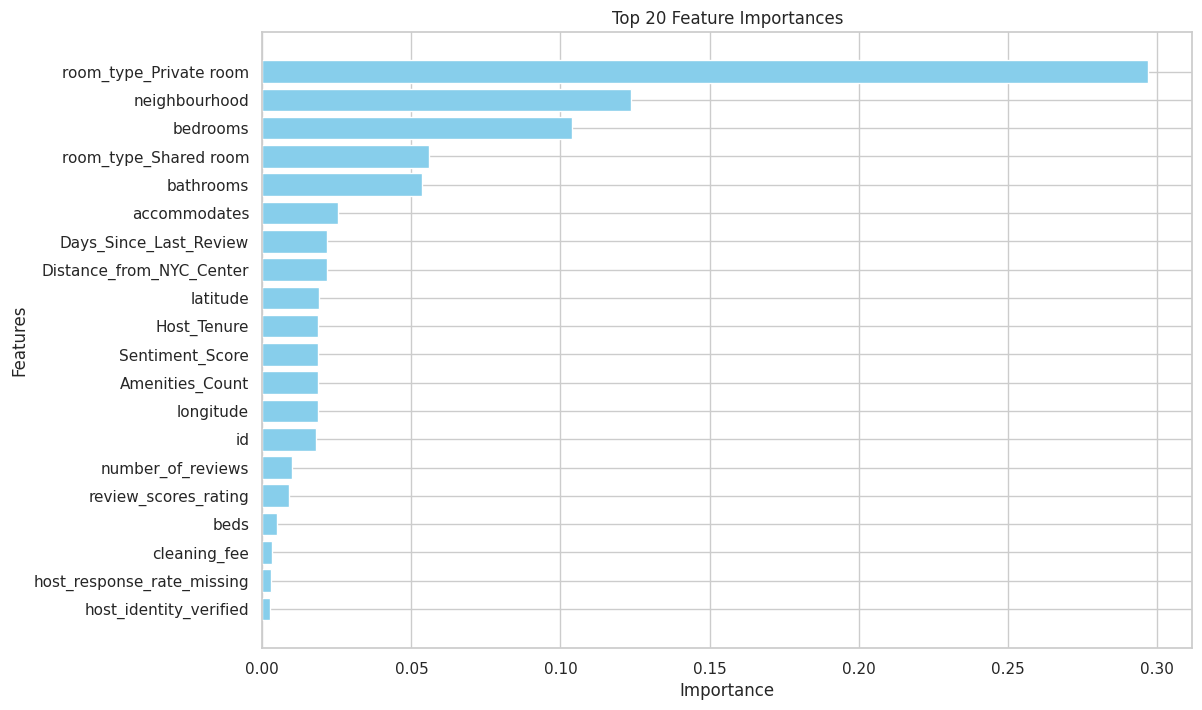

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

data_new_sample = data_new.sample(frac=0.1, random_state=42)
X_sample = data_new_sample.drop('log_price', axis=1)
y_sample = data_new_sample['log_price']
categorical_features = X_sample.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_features = X_sample.select_dtypes(exclude=['object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('to_string', FunctionTransformer(lambda x: x.astype(str), validate=False)),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline.fit(X_sample, y_sample)
feature_importances = pipeline.named_steps['regressor'].feature_importances_
cat_features_transformed = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features_transformed)

importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## 10. Predictive Performance Assesment

Root Mean Squared Error (RMSE): 0.30973843898163417
R-squared (R²): 0.8132507999888764


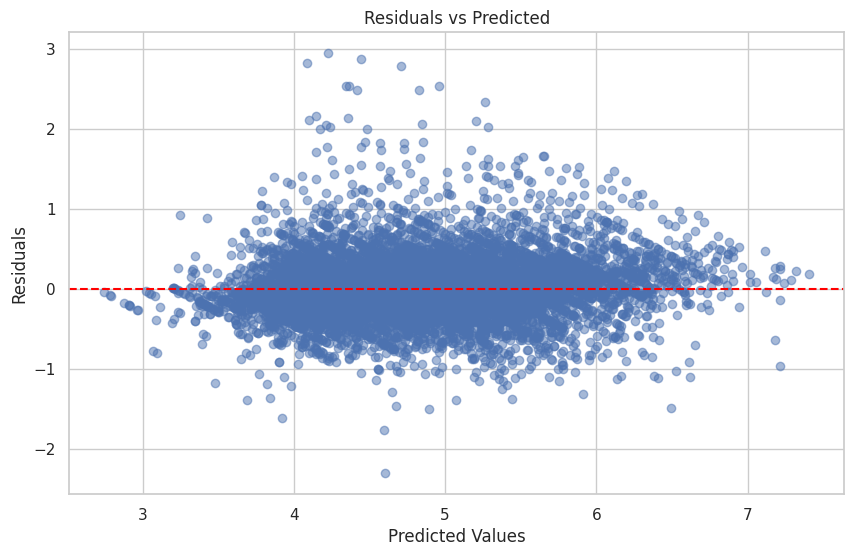

<ipython-input-30-8d8f88e3dd47>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


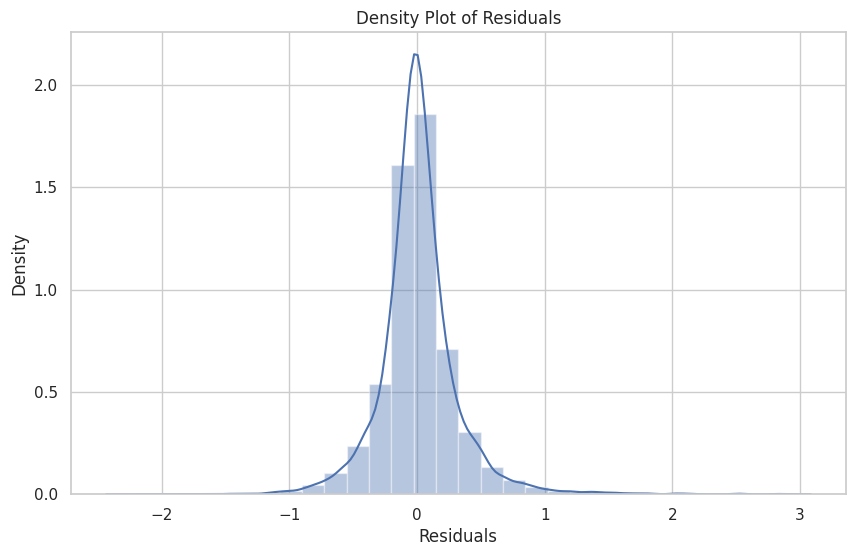

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


plt.figure(figsize=(10, 6))
sns.distplot(residuals, bins=30, kde=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


Thank You.